In [1]:
import seaborn as sns
iris=sns.load_dataset("iris")
print(iris.head())
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X=iris.iloc[:,:4].values
y=iris.iloc[:,4].values
print(y[:5])
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
print(y1[:5])
y2=pd.get_dummies(y1).values
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.2, stratify=y,
random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

model=Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
hist=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1632 - accuracy: 0.2083
Epoch 2/100
4/4 [==============================] - 0s 999us/step - loss: 1.0623 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9961 - accuracy: 0.6250
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9347 - accuracy: 0.5583
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8756 - accuracy: 0.6417
Epoch 6/100
4/4 [==============================] - 0s 1000us/step - loss: 0.8215 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7673 - accuracy: 0.6667
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7190 - accuracy: 0.6667
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.7000
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7667
Epoch 11/100
4/4 [======

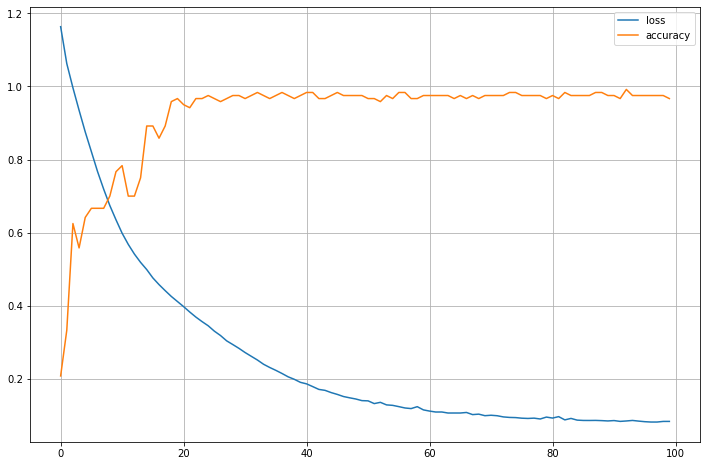

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [11]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print("정확도={:.2f}".format(accuracy))

정확도=1.00


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(pred[:10])
y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

[[9.9808769e-04 9.1404819e-01 8.4953673e-02]
 [9.9420553e-01 5.7944339e-03 1.8096915e-09]
 [6.2660931e-04 7.1496093e-01 2.8441244e-01]
 [8.3254534e-05 4.1659904e-01 5.8331770e-01]
 [2.1752072e-02 9.7508109e-01 3.1668174e-03]
 [4.3607124e-06 6.2043134e-02 9.3795246e-01]
 [9.9402434e-01 5.9757349e-03 4.0304631e-09]
 [9.0504761e-07 1.4269843e-02 9.8572922e-01]
 [6.1158715e-07 1.5401034e-02 9.8459840e-01]
 [9.9947196e-01 5.2808266e-04 2.9354988e-12]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [17]:
import joblib
joblib.dump(model, 'c:/data/iris/iris.model')

AttributeError: module 'tensorflow.python.framework.meta_graph' has no attribute '_op_name'

In [20]:
model.save('c:/data/iris/iris.keras')
model.save_weights('c:/data/iris.weight')